In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt
from sklearn.utils import resample
from keras.models import load_model

In [2]:
model=load_model("LSTM_model.keras")

In [3]:
df = pd.read_csv('../creditcard.csv')

In [4]:
x=df.drop('Class',axis=1)
y=df['Class']

In [13]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [14]:
print(x_train.shape,y_train.shape)

(213605, 30) (213605,)


In [15]:
print(x_test.shape,y_test.shape)

(71202, 30) (71202,)


In [16]:
r,c=x_test.shape
print(r,c)

71202 30


In [17]:
x_test=x_test.to_numpy()

In [18]:
x_test=x_test.reshape(r,c,1)

In [19]:
y_test_pred=model.predict(x_test)

2226/2226 [==============================] - 9s 4ms/step


In [22]:
y_test_pred=(y_test_pred>0.5).astype(int)

In [23]:
print("Accuracy on Training Data : ",accuracy_score(y_test,y_test_pred))

Accuracy on Training Data :  0.9982444313361984


In [24]:
print("Classification Report :\n",classification_report(y_test_pred,y_test))

Classification Report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     71190
           1       0.00      0.00      0.00        12

    accuracy                           1.00     71202
   macro avg       0.50      0.50      0.50     71202
weighted avg       1.00      1.00      1.00     71202



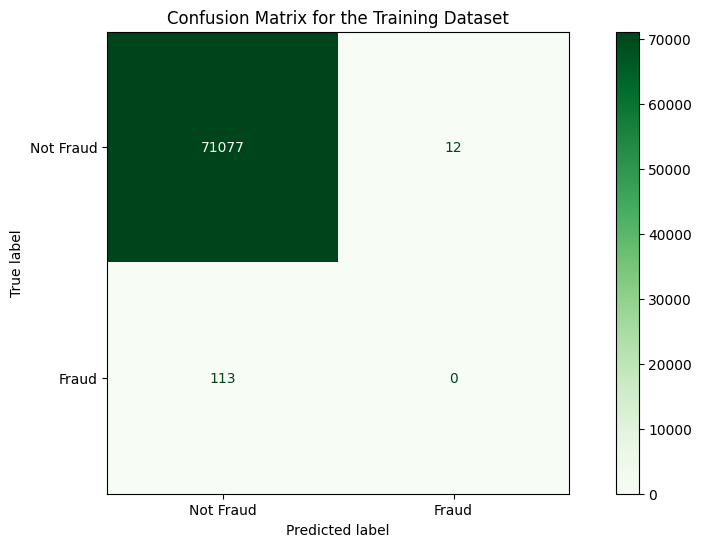

In [37]:
cm = confusion_matrix(y_test, y_test_pred, labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['Not Fraud', 'Fraud'])
disp.plot(cmap='Greens')
plt.title('Confusion Matrix for the Training Dataset')
plt.show();